# Research Summary for July 18th, 2023

By Bora Basyildiz

## Imports

In [27]:
#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

plt.rcParams["mathtext.fontset"] = 'cm' #Allows matplotlib plots to have latex eqs/symbols

#Plotting function for 
def genPlot(fname,df,l,m="o",msize=5):
    plt.plot(df["time"],df["fidelity"],marker=m,markersize=msize)
    plt.xlabel('$T/T_{min}$',fontsize=16)
    plt.ylabel('$F$',fontsize=16)
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)
mainDir = "../Figures/Summary_0718/"
try: #All files are stored under their gateType
    os.makedirs(mainDir)
except:
    pass 
#plt.savefig(os.path.join(os.getcwd(),mainDir,"Ashhab_Hopping.pdf"), format="pdf")

## Normalized Analysis of Max Frequency vs. Time

Here we will redo our analysis for the Max Single Qubit Drive Frequency $\Omega_{max}$ vs. the high fidelity saturation time $T_F$ where fidelity $F$ is $\geq 99\%$ at time $T_F$. Previously we did this analysis but the comparison was off due to a normlization error. Fixing this, we have

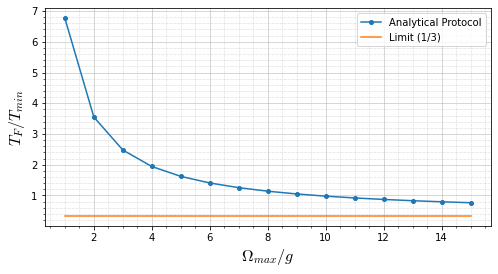

In [28]:
from numpy import arctan,sqrt,linspace,pi

npoints = 15
ttotal  = lambda g: (2*pi + 4*arctan(sqrt(2)))/g + pi/6
garr = linspace(1,npoints,npoints)
times1 = [ttotal(g)/(pi/2) for g in garr]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr,times1,marker="o",markersize=4)
plt.plot(garr, [1/3]*len(garr))
plt.legend(["Analytical Protocol","Limit (1/3)"])

We observe that the analytical protocol has the expected same of $f(1/g)$, and it should approach the asympotic value of $(1/3)$, as we have a speed-up of $3$. Looking at the limit of our function, we have

The last point has time: 0.397660271252109


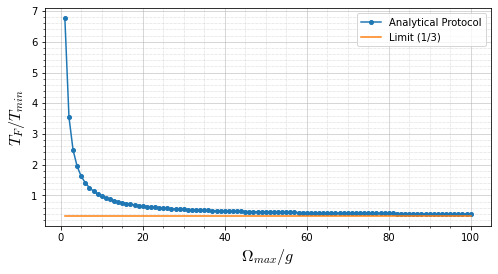

In [29]:
npoints = 10 ** 2
garr2 = linspace(1,npoints,npoints)
times2 = [ttotal(g)/(np.pi/2) for g in garr2]

print("The last point has time: " + str(times2[-1]))
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr2,times2,marker="o",markersize=4)
plt.plot(garr2, [1/3]*len(garr2))
plt.legend(["Analytical Protocol","Limit (1/3)"])

Here we see that the analytical protocol approach the correct limit as $\Omega_{max}/g\to\infty$. Now let's compare this to our numerical results 

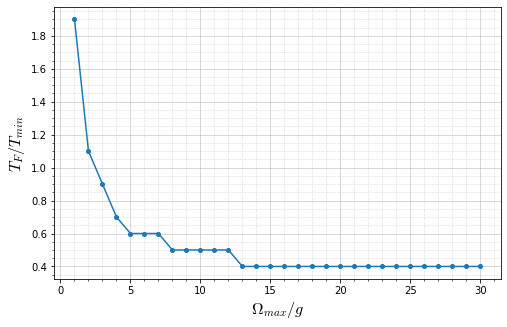

In [30]:
freq = []
times = []
for i in range(1,31):
    if i > 10: file = "../Data/PastWendianData//Qutrit_iSWAP_AnalyticalSpeedUp_M16_all_g1.0_maxT1.0_maxD" + str(i) + ".csv"
    else: file = "../Data/PastWendianData//Qutrit_iSWAP_AnalyticalSpeedUp_M16_all_g1.0_maxT3.0_maxD" + str(i) + ".csv"
    df = pd.read_csv(file,names=["fidelity","time"])
    df.sort_values(by="time",inplace=True)
    #print(df[df["fidelity"] >= 0.99]["time"].min())
    freq.append(i)
    times.append(df[df["fidelity"] >= 0.99]["time"].min())
plt.figure(figsize=(8,5))
plt.xlabel('$\Omega_{max}/g$',fontsize=16)
plt.ylabel('$T_F/T_{min}$',fontsize=16)
#plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()

numP = 30
#plt.plot(garr[:numP],times1[:numP],"o-")
plt.plot(freq[:numP],times[:numP],marker="o",markersize=4)
#plt.legend(["Analytical","Optimal Control"])
#plt.savefig(os.path.join(os.getcwd(),mainDir,"0711_ExpFreq.pdf"), format="pdf")

Here we have the results from Wendian. Now let's compare them to the previous plot.

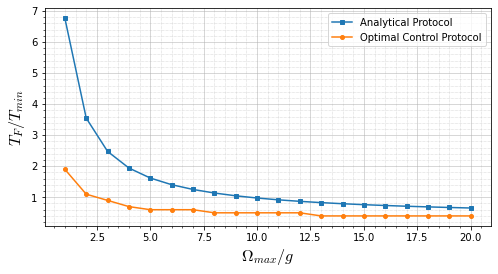

In [52]:
numP = 20
plt.figure(figsize=(8,4))
plt.xlabel('$\Omega_{max}/g$',fontsize=16)
plt.ylabel('$T_F/T_{min}$',fontsize=16)
#plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr2[:numP],times2[:numP],marker="s",markersize=4)
plt.plot(freq[:numP],times[:numP],marker="o",markersize=4)
#plt.plot(garr2[:numP], [1/3]*len(garr2[:numP]))
plt.legend(["Analytical Protocol","Optimal Control Protocol","Limit (1/3)"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"QSim_Compar.pdf"), format="pdf")

Here we see that our optimal control converges to the limit much faster than our theoretical limit. This shows that while our optimal control may be theoretically worse than our analyitical protocol, in practice the single qutrit rotations take a significant amount of time, leading to our optimal control algorithm performing better than low max strength single qudut rotations. In the $\Omega_{max}/g$ limit, both protocols should saturate the 3x speed-up limit. 

Yet, we can improve the comparison between these two plots by accounting parallelization of the single qutrit gates. Hence one of the single qutrit drives can be done in parallel with the other, decreasing the time calculation by a factor of $2\arctan(\sqrt{2})$ leading to $$T_{total} = \frac{\pi + 2\arctan(\sqrt{2})}{g} + \pi/6.$$ Now lets redo our comparison

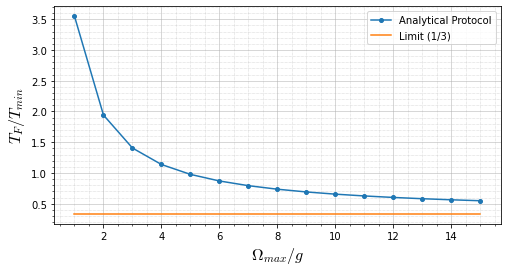

In [32]:
from numpy import arctan,sqrt,linspace,pi

npoints = 15
ttotal  = lambda g: (pi + 2*arctan(sqrt(2)))/g + pi/6
garr = linspace(1,npoints,npoints)
times1 = [ttotal(g)/(pi/2) for g in garr]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr,times1,marker="o",markersize=4)
plt.plot(garr, [1/3]*len(garr))
plt.legend(["Analytical Protocol","Limit (1/3)"])

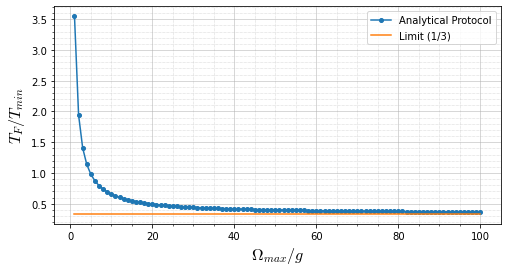

In [33]:
npoints = 10 ** 2
ttotal  = lambda g: (pi + 2*arctan(sqrt(2)))/g + pi/6
garr = linspace(1,npoints,npoints)
times1 = [ttotal(g)/(pi/2) for g in garr]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr,times1,marker="o",markersize=4)
plt.plot(garr, [1/3]*len(garr))
plt.legend(["Analytical Protocol","Limit (1/3)"])

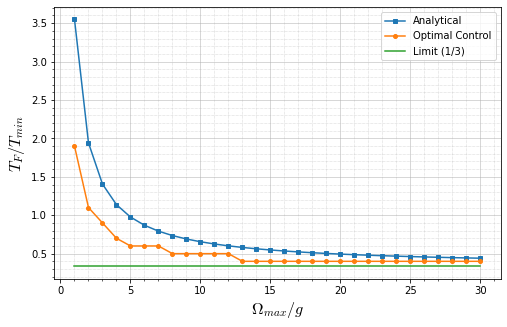

In [34]:
plt.figure(figsize=(8,5))
plt.xlabel('$\Omega_{max}/g$',fontsize=16)
plt.ylabel('$T_F/T_{min}$',fontsize=16)
#plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr[:numP],times1[:numP],marker="s",markersize=4)
plt.plot(freq[:numP],times[:numP],marker="o",markersize=4)
plt.plot(garr[:numP], [1/3]*len(garr[:numP]))
plt.legend(["Analytical","Optimal Control","Limit (1/3)"])

## iTwoPhonon Gate Max Frequency Analysis

Here we will look at the iTwoPhonon gate, which is the $iSWAP$ gate without the $X_2$ flip in our analytical protocol. This matrix looks like

In [35]:
# Read the CSV file using NumPy's `genfromtxt` function
data = np.genfromtxt("../Data/iTwoPhonon/iTwoPhonon.csv", delimiter=',',dtype=complex)
# Convert the data into a NumPy array
iTwoPhonon = np.array(data,dtype=complex)
print(iTwoPhonon)

# print("array([",end="")
# for i,row in enumerate(iTwoPhonon):
#     print("[",end="")
#     for j,val in enumerate(row):
#         if np.imag(val) != 0: print(int(val.imag),end="j")
#         else: print(int(val.real),end="")
#         if j != len(row)-1: print(",",end="")
#     print("]",end="")
#     if i != len(iTwoPhonon) - 1: print(",",end="")
# print("])",end="")
iTwoPhonon = np.array([[0,0,0,0,-1j,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[-1j,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1]])
#print(iTwoPhonon)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


The $\Omega_{max}/g$ vs. $T_F/T_{min}$ plot for our analytical protocol will be 

\begin{align*}
    T_{total} = \frac{2\arctan(\sqrt{2})}{g} + \pi/6.
\end{align*}


which is our previous eq. without the $X_2$ $\pi/2$ angle. N 

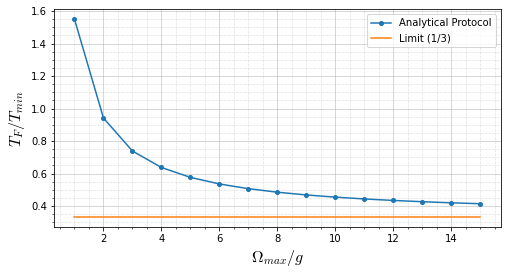

In [36]:
from numpy import arctan,sqrt,linspace,pi

twoPpoints = 15
twoPtotal  = lambda g: (2*arctan(sqrt(2)))/g + pi/6
twoPg = linspace(1,twoPpoints,twoPpoints)
twoPtimes = [twoPtotal(g)/(pi/2) for g in twoPg]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(twoPg,twoPtimes,marker="o",markersize=4)
plt.plot(twoPg, [1/3]*len(twoPg))
plt.legend(["Analytical Protocol","Limit (1/3)"])

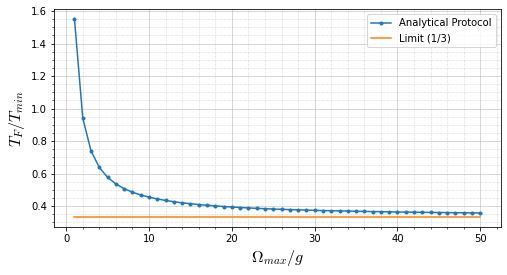

In [37]:
twoPpoints = 50
twoPtotal  = lambda g: (2*arctan(sqrt(2)))/g + pi/6
twoPg = linspace(1,twoPpoints,twoPpoints)
twoPtimes = [twoPtotal(g)/(pi/2) for g in twoPg]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(twoPg,twoPtimes,marker="o",markersize=3)
plt.plot(twoPg, [1/3]*len(twoPg))
plt.legend(["Analytical Protocol","Limit (1/3)"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"twoPhononAnalyFreq.pdf"), format="pdf")

Now let's compare this to our numerical optimization. 

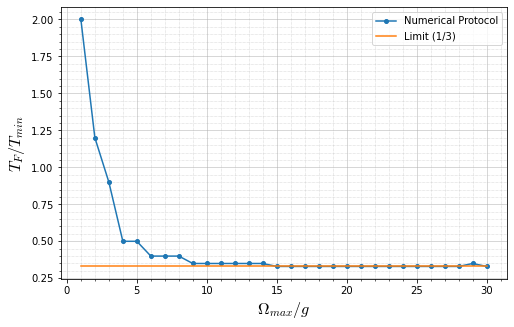

In [38]:
twoPhonF = []
twoPhonT = []
for i in range(1,31):
    maxT = 0
    if i > 10: maxT = 0.5
    elif i > 5: maxT =1.0
    else: maxT = 3.0
    file = "../Data/Analy/Fidelities/Qutrit_iTwoPhonon_Analy_M16_dipoleAll_g1.0_maxT" + str(maxT) + "_maxD" + str(i) + ".csv"
    df = pd.read_csv(file,names=["fidelity","time"])
    df.sort_values(by="time",inplace=True)
    #print(df[df["fidelity"] >= 0.99]["time"].min())
    twoPhonF.append(i)
    twoPhonT.append(df[df["fidelity"] >= 0.99]["time"].min())
plt.figure(figsize=(8,5))
plt.xlabel('$\Omega_{max}/g$',fontsize=16)
plt.ylabel('$T_F/T_{min}$',fontsize=16)
#plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()

plt.plot(twoPhonF,twoPhonT,"o-",markersize=4)
plt.plot(twoPhonF, [1/3]*len(twoPhonF))
plt.legend(["Numerical Protocol","Limit (1/3)"])

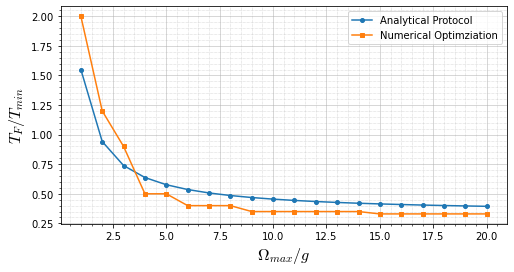

In [39]:
maxO = 20
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(twoPg[:maxO],twoPtimes[:maxO],marker="o",markersize=4)
plt.plot(twoPhonF[:maxO],twoPhonT[:maxO],"s-",markersize=4)
plt.legend(["Analytical Protocol","Numerical Optimziation"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"QSim_OmegaMax.pdf"), format="pdf")

Here we see that while our anayltical protocol is better for small $\Omega_{max}/g$, our numerical optimziation leads to faster convergence to the speed-limit, outperforming the analytical protocol when $\Omega_{max}/g \geq 4$. This is likely due to the non-trivial time that the single qutrit rotations take in the analytical protocol. Since the numerical protocol does both in the same timestep, we can saturate the speed-limit faster as $\Omega_{max}/g$ increases.

Here we see that our numerical optimization converges to the speed-up limit at $\Omega_{max}/g = 15$, and that we can get near the limit starting at $\Omega_{max}/g = 9$. Let's compare this to our analytical protocol

## Analysis of Operator Norm Scaling for Dense Non-local Hamiltonians with Unit Couplings

Here we will look at our the operator norm grows in terms of energy levels $d$ for a Hamiltonian with all possible couplings with unit strength. Essentially this is a Hamiltonian with all ones as its entries. 

In [40]:
import numpy as np 
from numpy import ones
from numpy.linalg import eigvals

OpNorm = lambda d: max(abs(eigvals(ones((d**2,d**2)))))

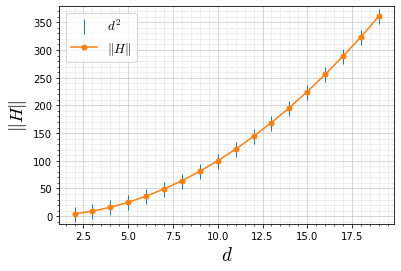

In [41]:
import matplotlib.pyplot as plt 
#Data/ Data Generation
elevels = [d for d in range(2,20)]
norms = [OpNorm(d) for d in elevels]
dscale = [d ** 2 for d in elevels]

#Plot Formatting 
plt.rcParams["mathtext.fontset"] = 'cm' #Allows matplotlib plots to have latex eqs/symbols
plt.xlabel('$d$',fontsize=19)
plt.ylabel('$\|H\|$',fontsize=18)
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()

#Plotting 
plt.plot(elevels,dscale,marker="|",markersize=15,label=r'$d^2$',linestyle='')
plt.plot(elevels,norms,marker="o",markersize=5,label=r'$\|H\|$')
plt.legend(fontsize=13)
plt.savefig(os.path.join(os.getcwd(),mainDir,"0718_NormScale.pdf"), format="pdf")

Here we see that the operator norm of a Hamiltonian with all unit entires scales exactly as $d^2$. 

## Modeling Leakage to Higher Energy States

Here we will incorporate leakge to the higher energy states of a qubit system into our numerical optimization. To do this, we will add terms to our drive Hamiltonian. Our original drive Hamiltonian was

\begin{align*}
    H_D^m &= \sum_{i=1}^N \left(\Omega^x_{i}\sigma^x_i + \Omega^y_i\sigma^y_i\right)\\
    U &= \prod_{m=1}^Me^{-i(H_C + H_D^m)\frac{m}{M}}
\end{align*}

where $N$ is the number of qubits, $H_C$ is our coupling Hamiltonian, and $M$ represents the total number of drives. Now we will add terms to $H_D^m$ that model leakage

\begin{equation*}
    H_D^m = \sum_{i=1}^N \left(\Omega^x_{i}(\sigma^x_i + \lambda^x_i) + \Omega^y_i(\sigma^y_i + \lambda^y_i) + \delta_i\ket{2}\bra{2}\right)\\
\end{equation*}

where $\lambda^x_i$ and $\lambda^y_i$ represent the Pauli equivalents between states $\ket{1}\longleftrightarrow\ket{2}$ and $\delta$ represents the anharmonicity of our system. We will assume that anharmonicity for each qubit is constant such that $\delta_i$. We should expect that as $\delta$ increases, the leakage to the $\ket{2}$ gets smaller and smaller. Also, we are only modeling leakage to the $\ket{2}$ state. 

To test our numerics, we will generate a $CNOT$ gate with an $XX$ coupled Hamiltonian with no higher energy couplings. Here we will presume that our anharmonicity is equal to our couplings strength such that $\delta = 1$.

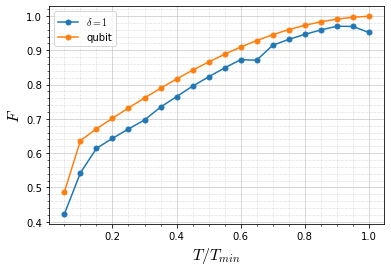

In [42]:
leakyXX = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage1_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leakyXX = leakyXX.sort_values(by=["time"])

qubit = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_all_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
qubit = qubit.sort_values(by=["time"])
#CNOT_DF = CNOT_DF.reset_index().drop('index',axis=1).drop(index=[0])

genPlot("",leakyXX,["XX with leakage"])
genPlot("",qubit,["$\delta = 1$","qubit"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"LeakageD1.pdf"), format="pdf")

Here we observe that even if low anharmonicity we will acheive relatively high fidelties, but we are outperforemd by the qubit optimziation with no leakage. This is to be expected for no anharmonicity. Let's increase the anharmonicity and see if our optimziation converges to the non-leakage numerics. 

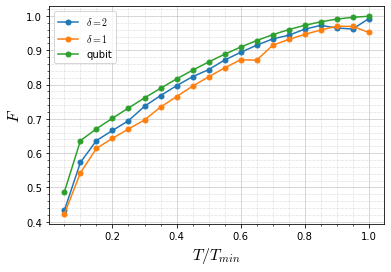

In [43]:
leakyXX2 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage2_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leakyXX2 = leakyXX2.sort_values(by=["time"])

genPlot("",leakyXX2,["XX with leakage"])
genPlot("",leakyXX,["XX with leakage"])
genPlot("",qubit,["$\delta = 2$","$\delta=1$","qubit"])

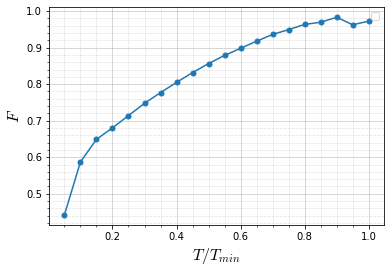

In [44]:
leakyXX3 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage3_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leakyXX3 = leakyXX3.sort_values(by=["time"])
genPlot("",leakyXX3,[])

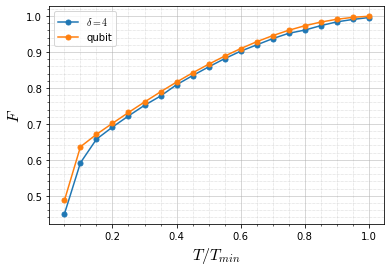

In [45]:
leakyXX4 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage4_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leakyXX4 = leakyXX4.sort_values(by=["time"])
genPlot("",leakyXX4,[])
genPlot("",qubit,["$\delta=4$","qubit"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"LeakageD4.pdf"), format="pdf")

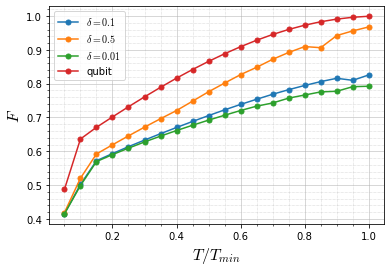

In [46]:
leakyXX01 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage0.1_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leakyXX01 = leakyXX01.sort_values(by=["time"])

leakyXX05 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage0.5_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leakyXX05 = leakyXX05.sort_values(by=["time"])

leakyXX001 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage0.01_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leakyXX001 = leakyXX001.sort_values(by=["time"])
genPlot("",leakyXX01,[])
genPlot("",leakyXX05,[])
genPlot("",leakyXX001,[])
genPlot("",qubit,["$\delta=0.1$","$\delta=0.5$","$\delta=0.01$","qubit"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"LeakageDesc.pdf"), format="pdf")